<a href="https://colab.research.google.com/github/lian-yann/My-Portfolio/blob/main/Prelim_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Log File Unique Visitor Analysis

- I made a C program that reads a log file and checks how many unique visitors accessed the website. A visitor is identified by the IP address only.

- My program uses a hash table to store each IP and avoid duplicates. Then i tested the program on different file sizes to measure time and memory usage.

## 1. Big-O Analysis (Worst Case)

My program does the following:

1. Reads each line of the log file - O(n).
2. Extracts the IP string from the line - O(1) because maximum length is fixed (256 chars).
3. Converts IP string to 32-bit integer using convert_ip() - O(1).
4. Inserts the IP into a hash table using insertUnique().

The hash insertion:

- Average case: O(1)
- Worst case (everything collides): linked list becomes long - O(n)

### Final Big-O:

- Average Time: O(n)
The program reads each line once and hash table insertion usually fast.

- Worst Time: O(n^2)
If many IP's go to the same hash slot, the linked list becomes long and searchingg becomes slower.

- Space: O(u)
The memory depends on how many unique IP's are stored in the hash table.

## 2. My C Code Used

```c
#include <stdio.h>
#include <stdlib.h>
#include <stdint.h>

#define TABLE_SIZE 1000


typedef struct Node {
    uint32_t ip;
    struct Node *next;
} Node;

Node *hashTable[TABLE_SIZE] = {0};

int hash(uint32_t ip) {
    return ip % TABLE_SIZE;
}

int convert_ip (char *ipStr, uint32_t * ipInt) {
    unsigned int a, b, c, d;
    if (sscanf(ipStr, "%u.%u.%u.%u", &a, &b, &c, &d) != 4)
    return 0;
if (a>255 || b>255 || c>255 || d>255)
return 0;

*ipInt = (a<<24) | (b<<16) | (c<<8) |d;
return 1;
}

int insertUnique(uint32_t ip) {
    int index = hash(ip);
    Node *currentNode = hashTable[index];
    while (currentNode != NULL) {
        if (currentNode->ip == ip) return 0;
        currentNode = currentNode->next;
    }

    Node *newNode = malloc(sizeof(Node));
    newNode->ip = ip;
    newNode->next = hashTable[index];
    hashTable[index] = newNode;
    return 1;
}

int main() {
    FILE *file = fopen("log100k.txt", "r");
    if(!file) {
        printf("File can't found.\n");
        return 1;
    }

    char line[256];
    char ipStr[32];
    uint32_t ipInt;
    int uniqueCount = 0;

    while (fgets(line, sizeof(line), file)) {
        int token = 0, i = 0, j =0;
        while (line[i] != '\0') {
            if (line[i] == ' ' || line[i] == '\n') {
                token++;
                i++;
                if(token > 2) break;
                j = 0;
                continue;
            }
            if (token == 2) ipStr[j++] = line[i];
            i++;
        }
        ipStr[j] = '\0';

        if (convert_ip (ipStr, &ipInt)) {
            if (insertUnique(ipInt)) uniqueCount++;
        }
    }

    fclose(file);

    printf("\nUnique IP's: %d\n", uniqueCount);

    return 0;
}
```



## 3. Input Files Used

I created multiple log files with different sizes:

(I just duplicate the first 1,000 lines to create another much bigger size of txt file)

- log1k.txt -> 1,000 lines
- log2k.txt -> 2,000 lines
- log4k.txt -> 4,000 lines
- log100k.txt -> 100,000 lines

## 4. Time Measurement & Error Checking

To get the running time of my Cprogram and to check if have errors, I used:

```
gcc prelim.c -o prelim && valgrind ./prelim && time ./prelim
```



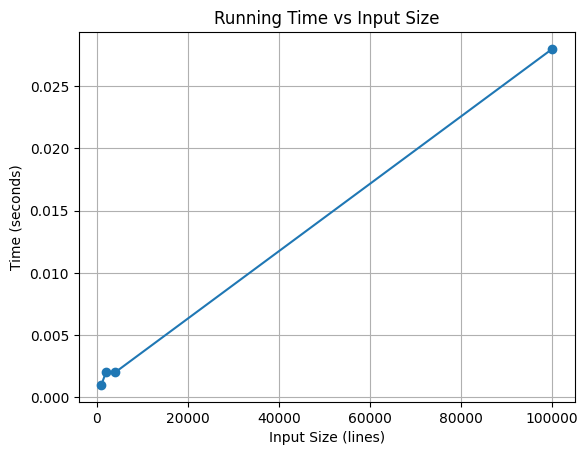

In [ ]:
import matplotlib.pyplot as plt

n = [1000, 2000, 4000, 100000]
time_values = [0.001, 0.002, 0.002, 0.028]

plt.plot(n, time_values, marker='o')
plt.title('Running Time vs Input Size')
plt.xlabel('Input Size (lines)')
plt.ylabel('Time (seconds)')
plt.grid(True)
plt.show()


## 5. Memory Usage

From `/usr/bin/time -v ./prelim`, I recorded:

- Maximum resident set size (kbytes)

This gives the memory consumed by the hash table and linked list nodes.

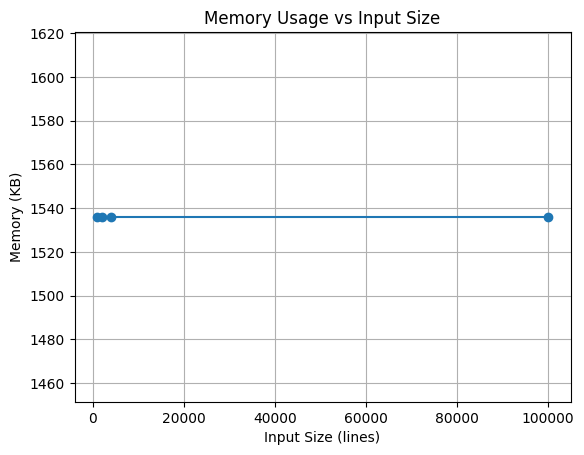

In [3]:
import matplotlib.pyplot as plt

n = [1000, 2000, 4000, 100000]
memory = [1536, 1536, 1536, 1536]

plt.plot(n, memory, marker='o')
plt.title('Memory Usage vs Input Size')
plt.xlabel('Input Size (lines)')
plt.ylabel('Memory (KB)')
plt.grid(True)
plt.show()


## 6. Comparison: Theory vs Actual Results

The theoretical time complexity of my algorithm iis O(n) on average, because hashing is normally constant time. The graphs from the tests match this because the run time increases slowly and almost linearly.

For memory, the usage increases as the number of unique IPs increases. This follows the expected O(u) pattern.

## Observations and Reflection

> This experiment helped me understand how to analyze an algorithm using both Big-O and real measurements. I saw that my hash table approach is very efficient for checking unique visitors.

> Creating bigger log files also showed how the program behaves when the input size grows. The time and memory results wereclose to what the theory predicted.

> Overall, this improved my understanding of data structures, C programming, and performance testing.